# EDA for Wine Dataset


### Preparations: Import necessary libraries


In [1]:
#import numpy for numerical operations
#pandas for data frames and data management
#matplotlib and seaborn (statistical data visualization) for plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns



#### Preparations: Make graphs bigger


In [2]:
# Make graphs bigger
plt.rcParams["figure.figsize"] = (8, 5)


### 1. Read data

In [3]:
# ----- 1) Read data -----
file_path = "Project SF2935.xlsx"  
sheet_name = "Wine data"
df = pd.read_excel(file_path, sheet_name=sheet_name)

### 2. Quick datacheck

In [4]:
# --- 2) Quick overview of data ---
display(df.head())
display(df.describe(include="all"))
print(df.info())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


### 3. Distribution of wine type

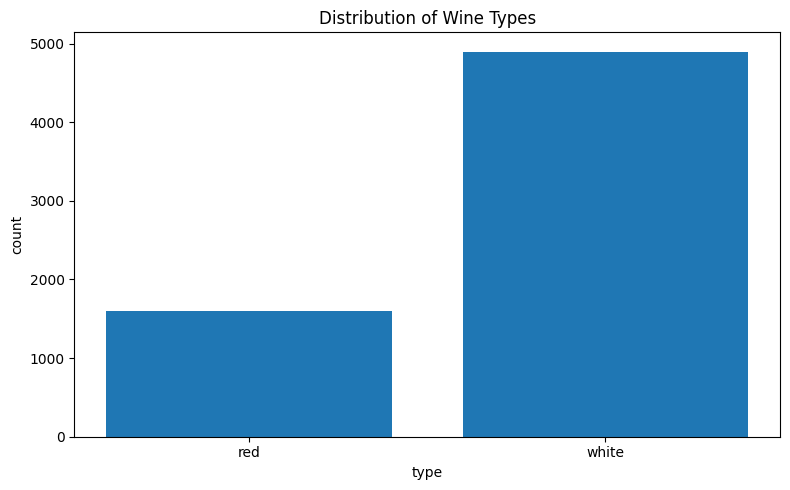

In [5]:
# --- 3) Distribution of winetype (bar chart) ---
type_counts = df["type"].value_counts().sort_index()
fig, ax = plt.subplots()
ax.bar(type_counts.index, type_counts.values)
ax.set_title("Distribution of Wine Types")
ax.set_xlabel("type")
ax.set_ylabel("count")
plt.tight_layout()
plt.show()

### 4. Alcohol-percentage by type

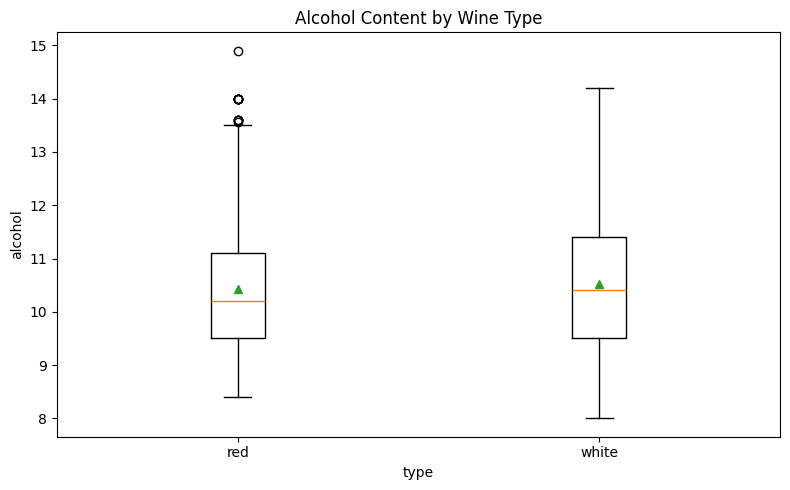

In [6]:
# --- 4) Alkoholpercentage per type (boxplot) ---
# Part into two arrays, one for each type
alcohol_red = df.loc[df["type"] == "red", "alcohol"].dropna().values
alcohol_white = df.loc[df["type"] == "white", "alcohol"].dropna().values

fig, ax = plt.subplots()
ax.boxplot([alcohol_red, alcohol_white], labels=["red", "white"], showmeans=True)
ax.set_title("Alcohol Content by Wine Type")
ax.set_xlabel("type")
ax.set_ylabel("alcohol")
plt.tight_layout()
plt.show()

### 5. Correlation Matrix

In [7]:
# ----- 5a) Correlation Matrix (numeric columns) -----
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(numeric_only=True)

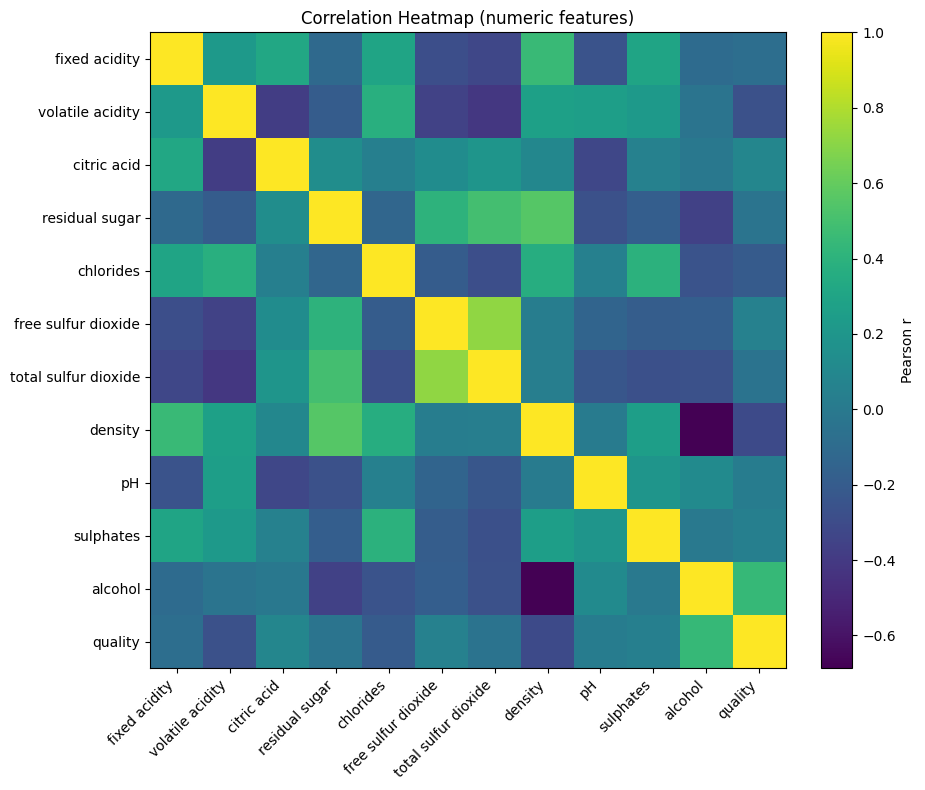

In [8]:
# ----- 5) Draw out heatmap (matplotlib) -----
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr, interpolation="nearest")
ax.set_title("Correlation Heatmap (numeric features)")
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.index)
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Pearson r")
plt.tight_layout()
plt.show()


In [9]:
# ----- 5b) Strong correlations (|r| ≥ 0.6), sorted by |r| -----

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
corr_upper = corr.where(mask)

corr_long = (
    corr_upper
    .stack()
    .reset_index()
    .rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0: "correlation"})
)

def classify_corr(val: float) -> str:
    if pd.isna(val):
        return "missing"
    if val >= 0.6:
        return "strong positive"
    elif 0.3 <= val < 0.6:
        return "moderate positive"
    elif 0 < val < 0.3:
        return "weak positive"
    elif val <= -0.6:
        return "strong negative"
    elif -0.6 < val <= -0.3:
        return "moderate negative"
    elif -0.3 < val < 0:
        return "weak negative"
    else:
        return "none"

corr_long["category"] = corr_long["correlation"].apply(classify_corr)
corr_long["direction"] = np.where(
    corr_long["correlation"] > 0, "positive",
    np.where(corr_long["correlation"] < 0, "negative", "none")
)

# Filter strong correlations (|r| ≥ 0.6) and sort by absolute value
strong = corr_long.loc[corr_long["category"].str.startswith("strong")].copy()
strong = strong.reindex(strong["correlation"].abs().sort_values(ascending=False).index)

print("Strong correlations (|r| ≥ 0.6), sorted by |r|:\n")
try:
    # display works in Jupyter; otherwise fall back to print
    display(strong.reset_index(drop=True))
except NameError:
    print(strong.reset_index(drop=True).to_string(index=False))


Strong correlations (|r| ≥ 0.6), sorted by |r|:



,feature_1,feature_2,correlation,category,direction
0,free sulfur dioxide,total sulfur dioxide,0.720934,strong positive,positive
1,density,alcohol,-0.686745,strong negative,negative


In [10]:
# ----- 5c) Save to new sheet in Excel -----
new_sheet = "Correlation report"  

# Replaces if existant
with pd.ExcelWriter(file_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    
    start_row = 0
    corr.to_excel(writer, sheet_name=new_sheet, startrow=start_row, index=True)
    
    
    pd.DataFrame({"": ["", "Starka korrelationer (|r| ≥ 0.6)"]}).to_excel(
        writer,
        sheet_name=new_sheet,
        startrow=start_row + corr.shape[0] + 2,
        index=False,
        header=False
    )
    
    
    strong_start = start_row + corr.shape[0] + 4
    strong.reset_index(drop=True).to_excel(
        writer,
        sheet_name=new_sheet,
        startrow=strong_start,
        index=False
    )

print(f"✅ Correlationsmatrix and strong correlations saved to Excel '{new_sheet}' in {file_path}.")

✅ Correlationsmatrix and strong correlations saved to Excel 'Correlation report' in Project SF2935.xlsx.


### 6. Scatterplots

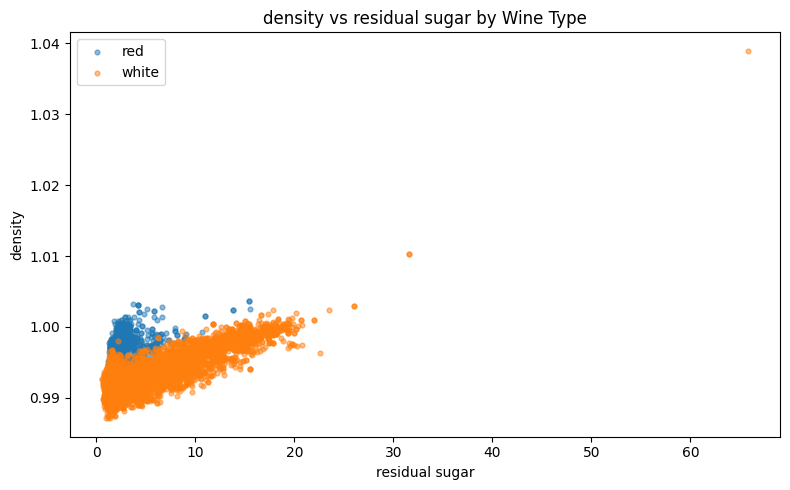

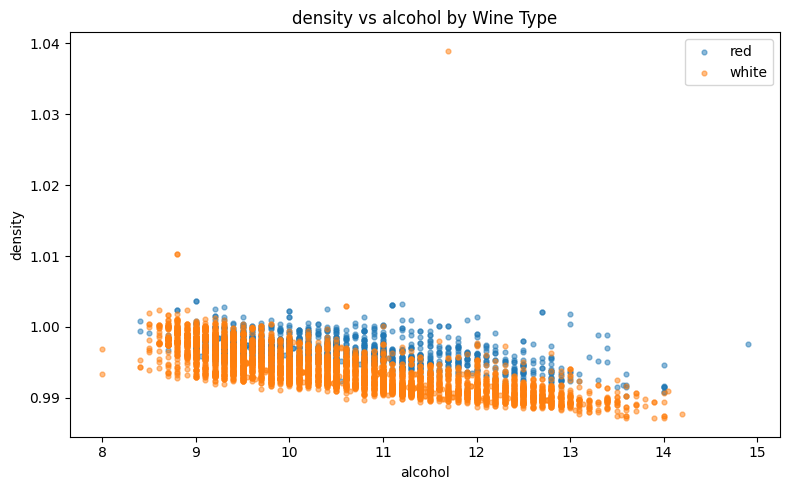

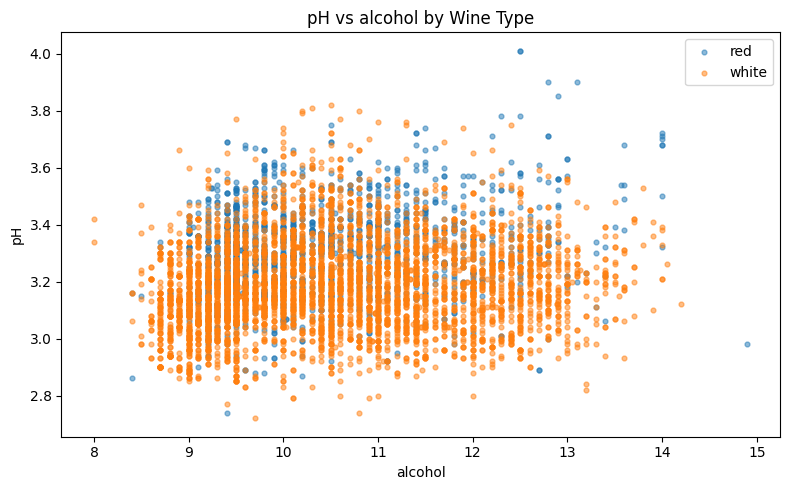

In [11]:
# --- 6) Scatterplots for selected features, separated by type --- 
def scatter_by_type(xcol, ycol):
    fig, ax = plt.subplots()
    # red
    dfr = df[df["type"] == "red"]
    ax.scatter(dfr[xcol], dfr[ycol], alpha=0.5, label="red", s=12)
    # white
    dfw = df[df["type"] == "white"]
    ax.scatter(dfw[xcol], dfw[ycol], alpha=0.5, label="white", s=12)
    ax.set_title(f"{ycol} vs {xcol} by Wine Type")
    ax.set_xlabel(xcol)
    ax.set_ylabel(ycol)
    ax.legend()
    plt.tight_layout()
    plt.show()

# relevant pairs from strong correlations and other interesting ones
scatter_by_type("residual sugar", "density")
scatter_by_type("alcohol", "density")
scatter_by_type("alcohol", "pH")

### 7. Histograms

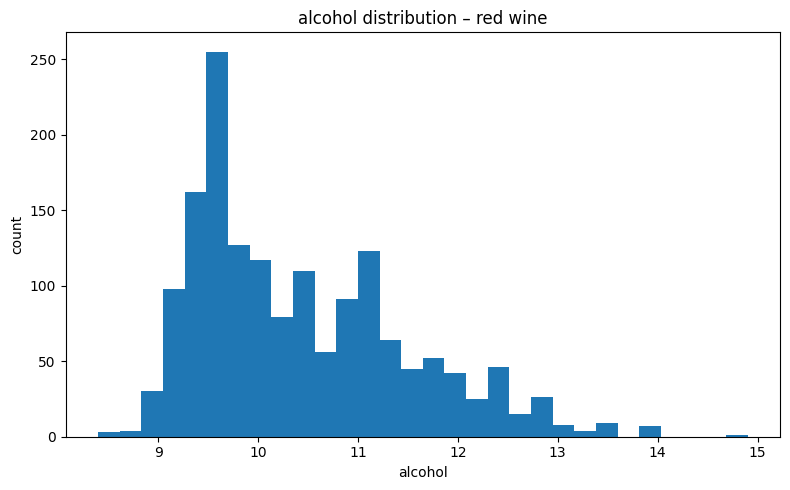

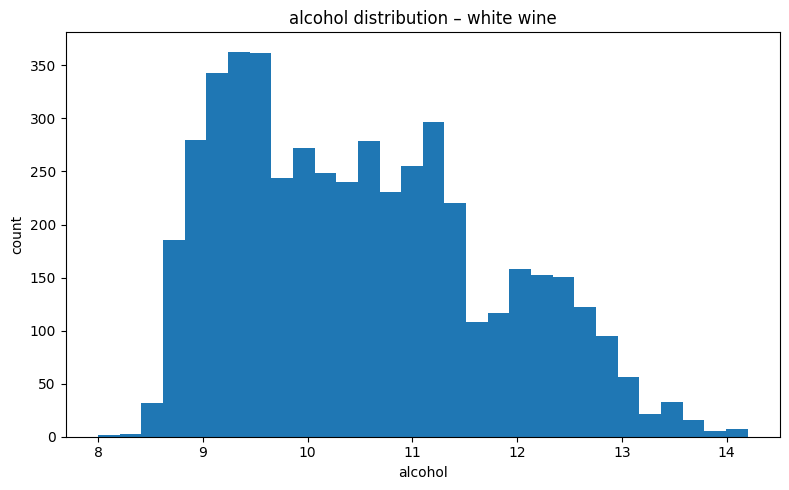

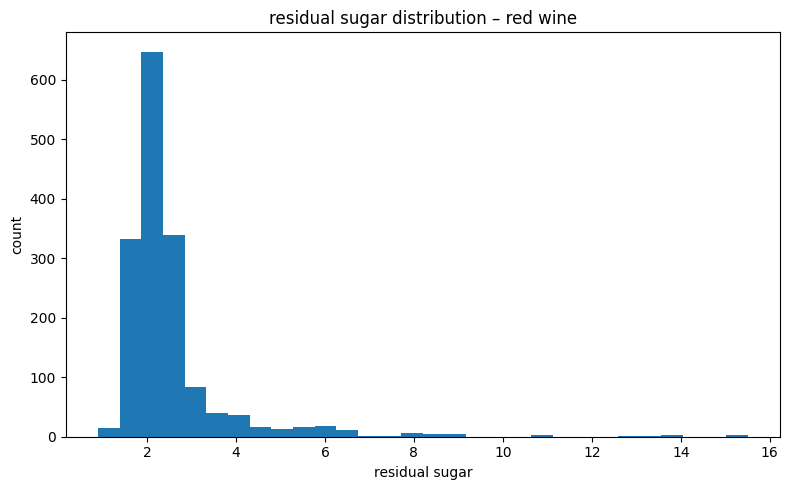

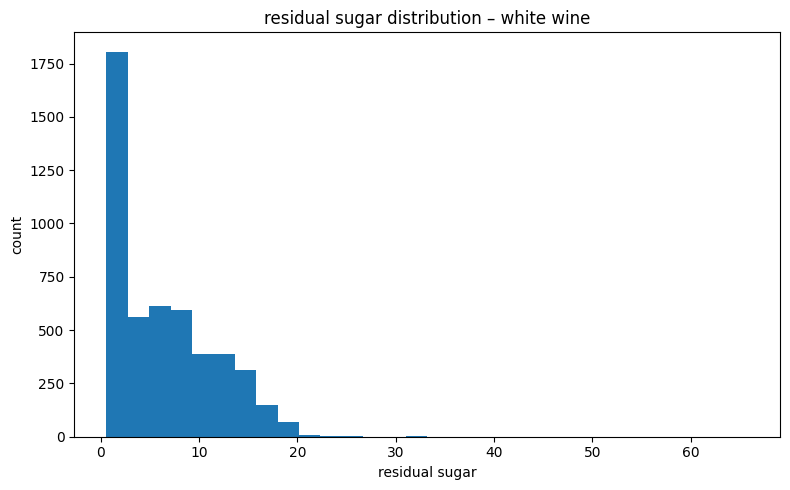

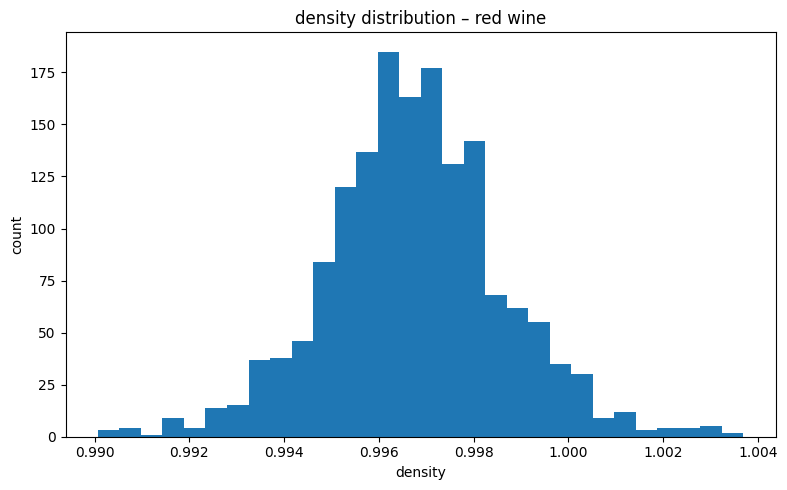

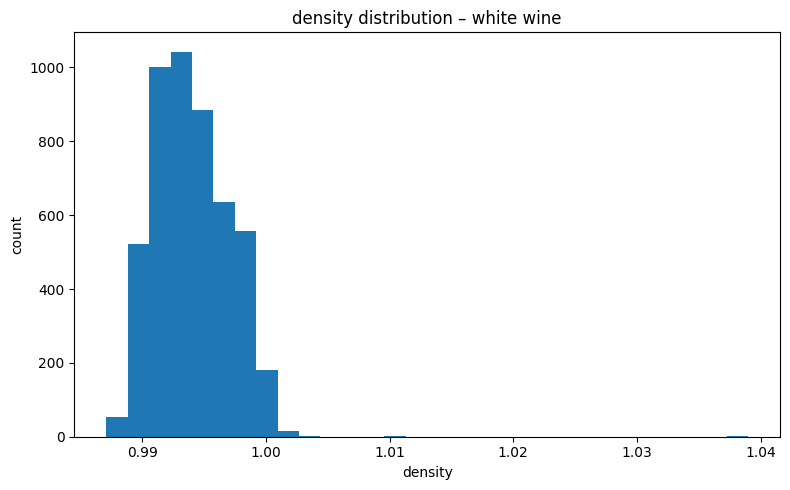

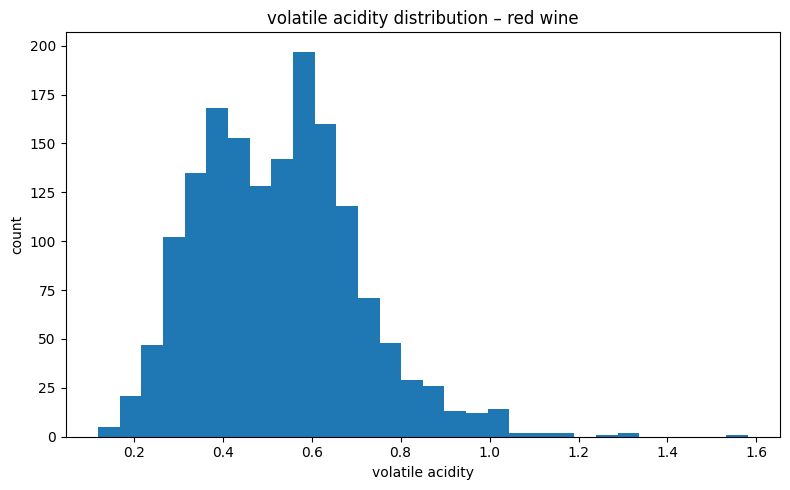

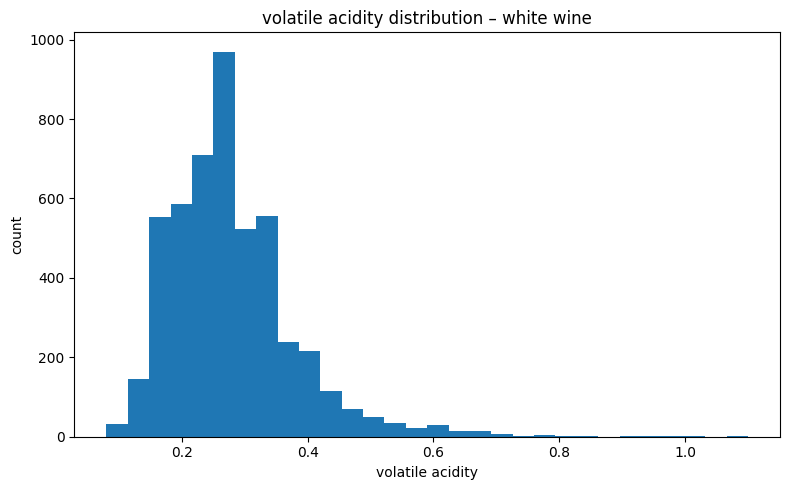

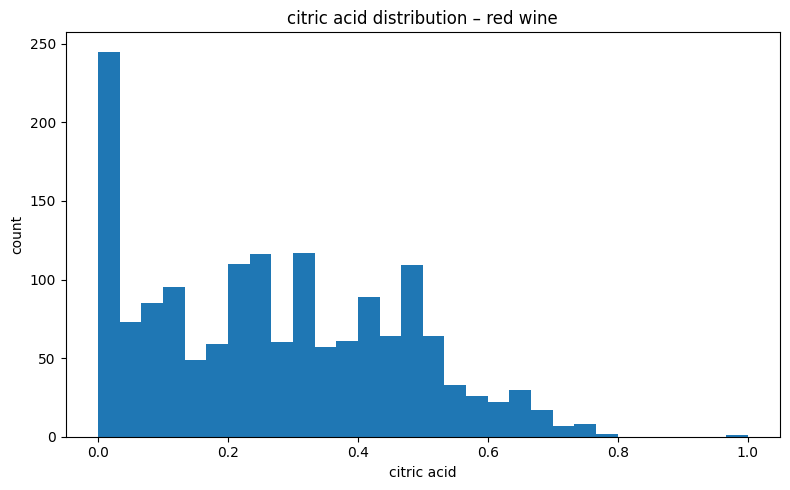

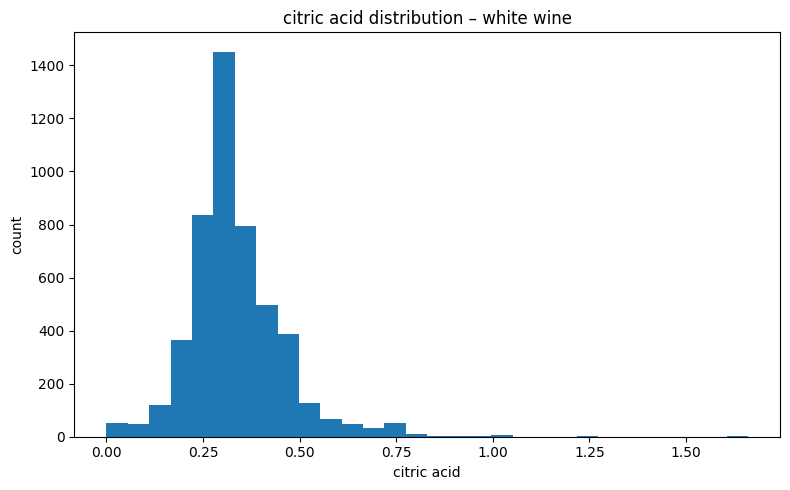

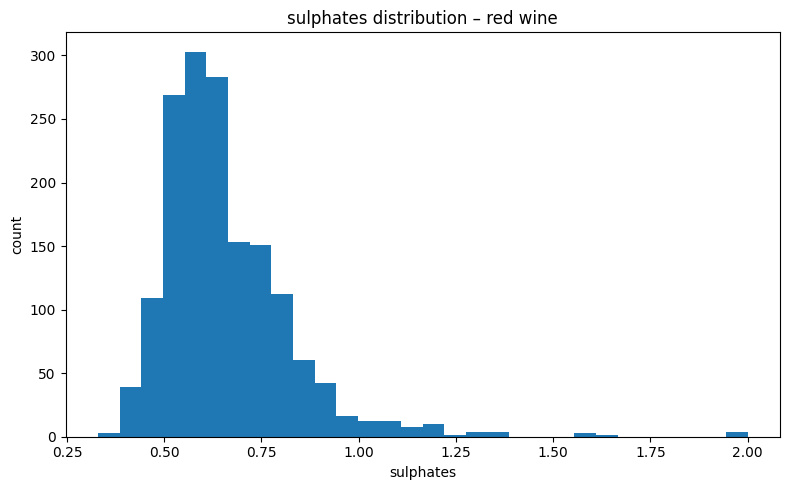

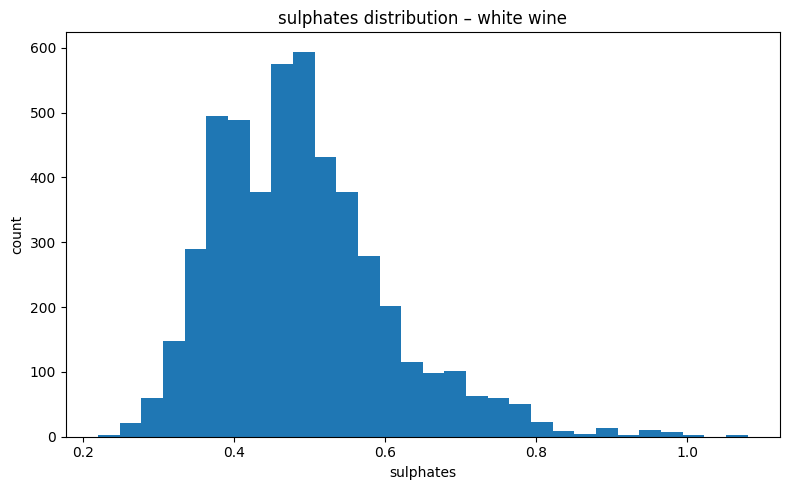

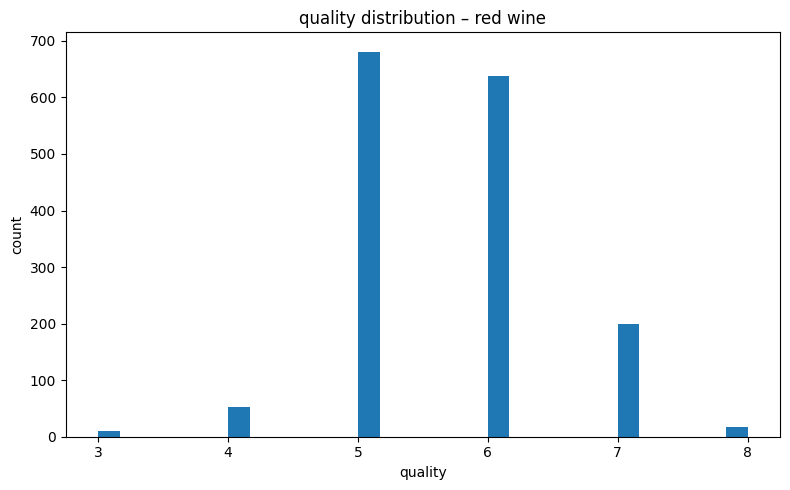

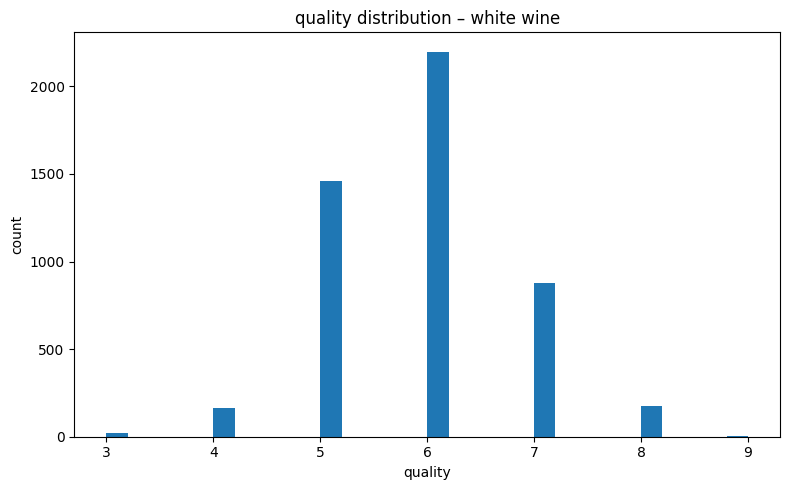

In [12]:
# --- 9)  Histogram per feature and type ---

    
features = ["alcohol", "residual sugar", "density", "volatile acidity", "citric acid", "sulphates", "quality"]

for feat in features:
    for t in ["red", "white"]:
        fig, ax = plt.subplots()
        vals = df.loc[df["type"] == t, feat].dropna()
        ax.hist(vals, bins=30)
        ax.set_title(f"{feat} distribution – {t} wine")
        ax.set_xlabel(feat)
        ax.set_ylabel("count")
        plt.tight_layout()
        plt.show()  

## For three classes

,count,proportion
quality_label_fixed,,
medium,4974,0.765584
high,1277,0.196552
low,246,0.037864


/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=hue_col, data=df, order=class_order, palette=palette)


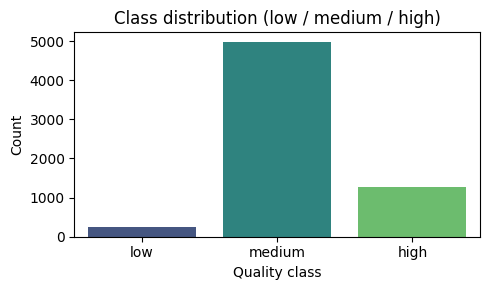

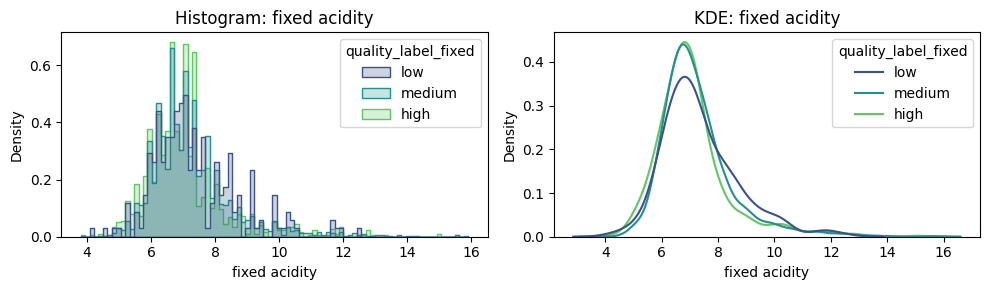

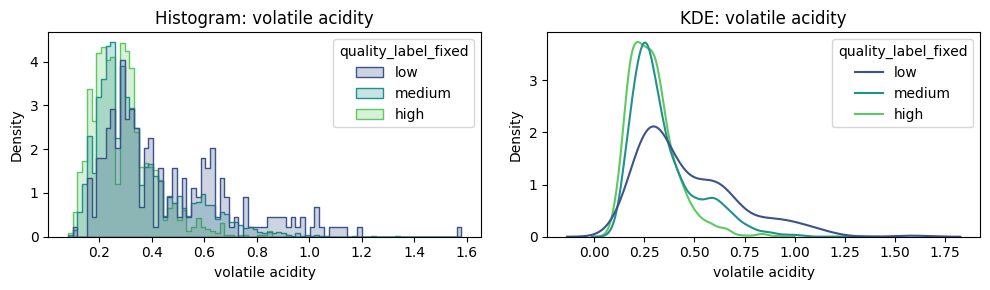

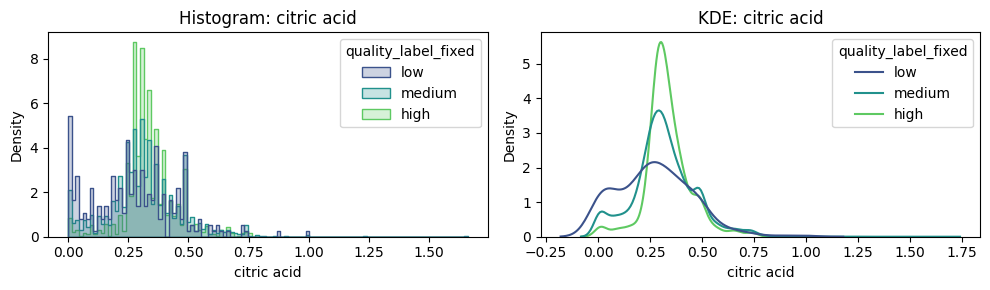

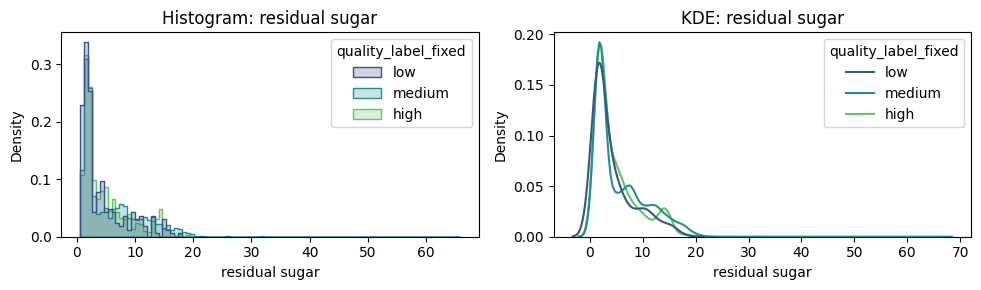

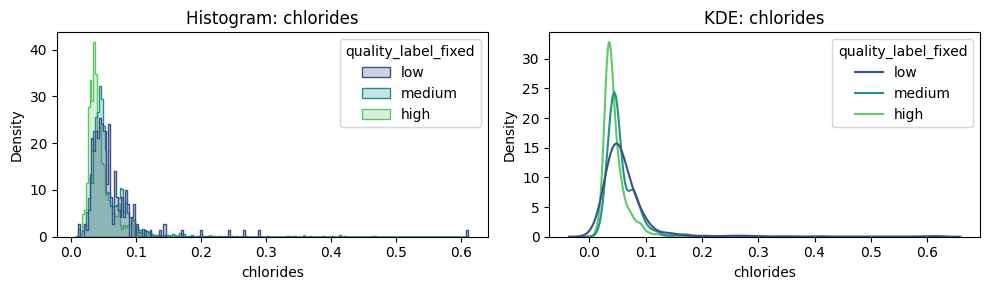

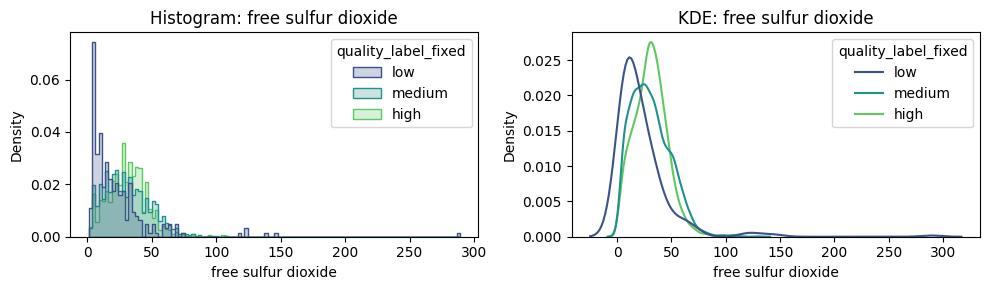

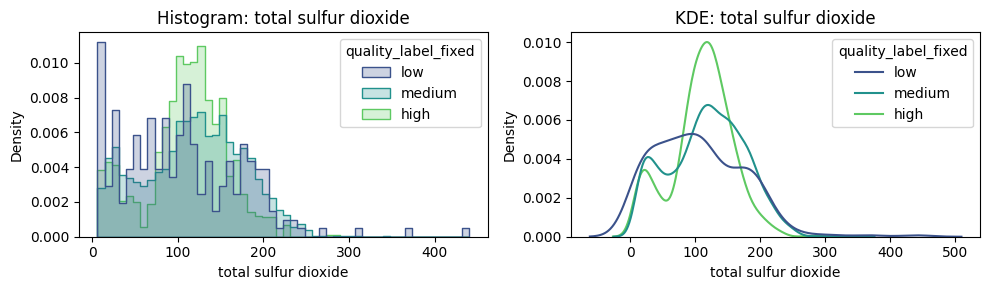

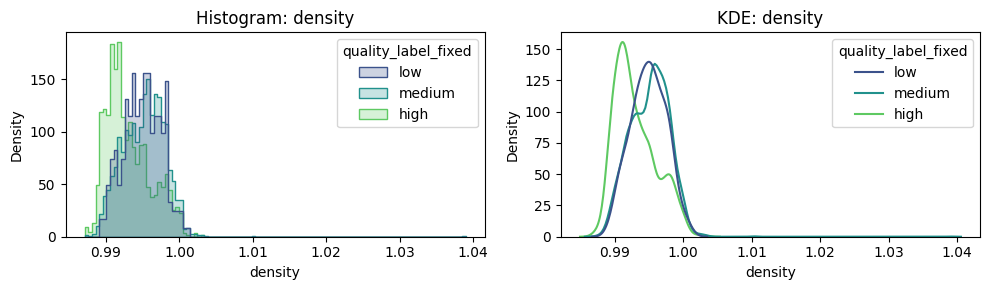

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue_col, y=col, data=df, order=class_order, palette=palette)


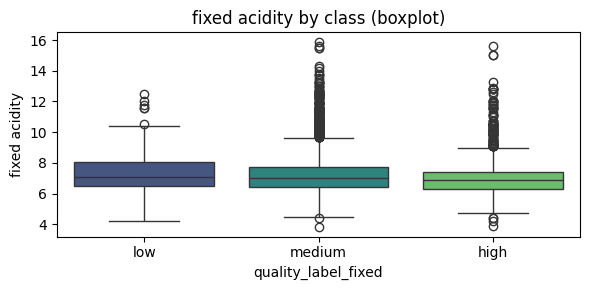

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue_col, y=col, data=df, order=class_order, palette=palette)


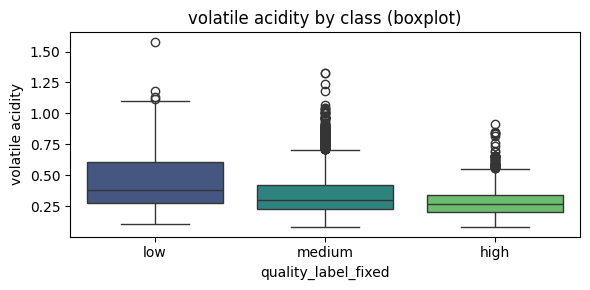

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue_col, y=col, data=df, order=class_order, palette=palette)


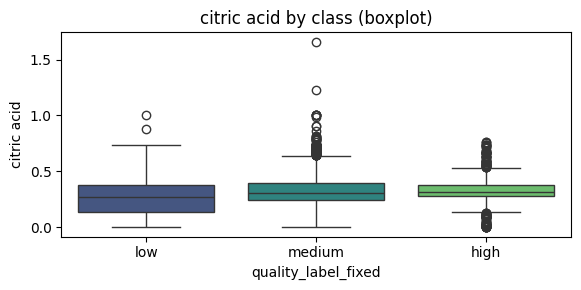

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue_col, y=col, data=df, order=class_order, palette=palette)


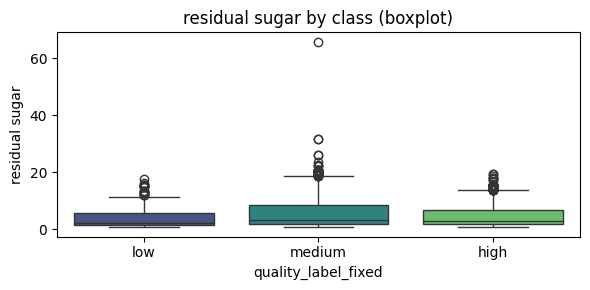

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue_col, y=col, data=df, order=class_order, palette=palette)


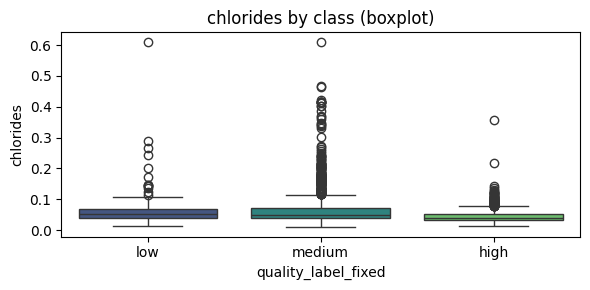

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue_col, y=col, data=df, order=class_order, palette=palette)


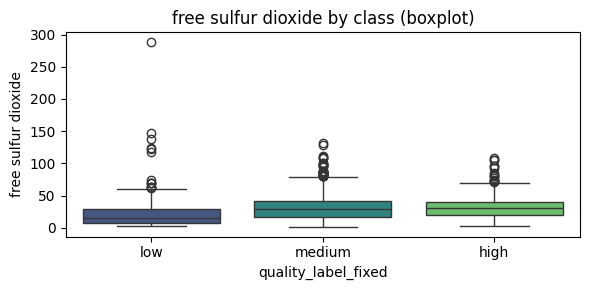

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue_col, y=col, data=df, order=class_order, palette=palette)


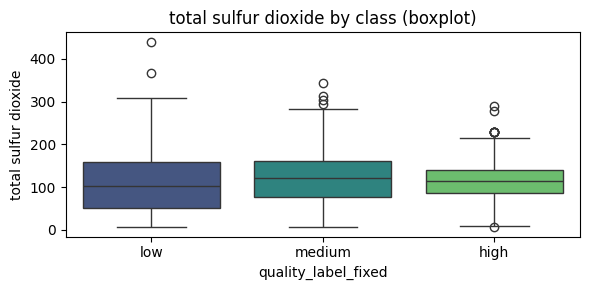

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue_col, y=col, data=df, order=class_order, palette=palette)


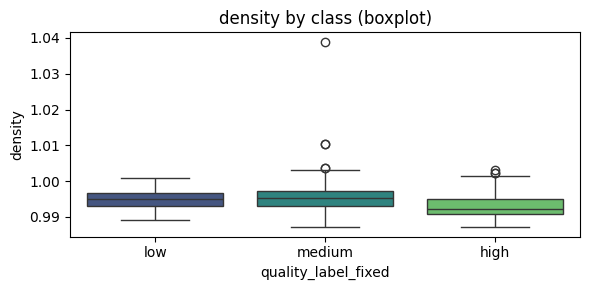

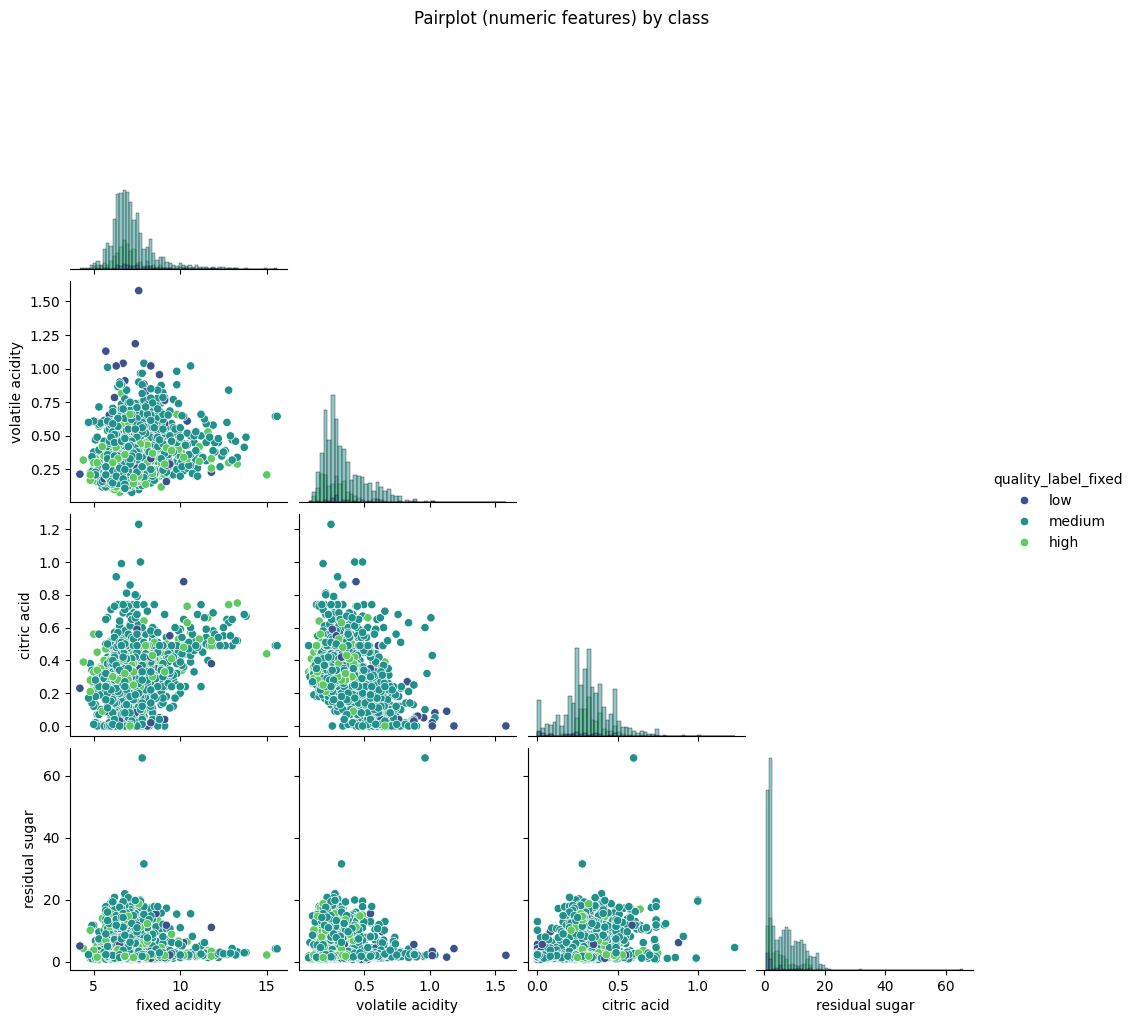

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hue_col, y=col, data=df, order=class_order, palette=palette, errorbar="ci")


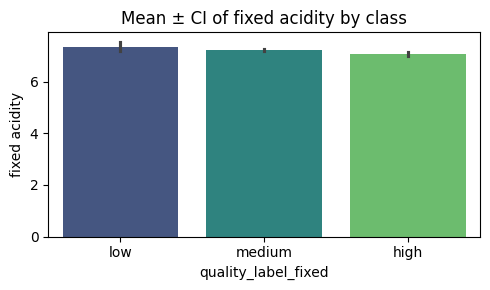

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hue_col, y=col, data=df, order=class_order, palette=palette, errorbar="ci")


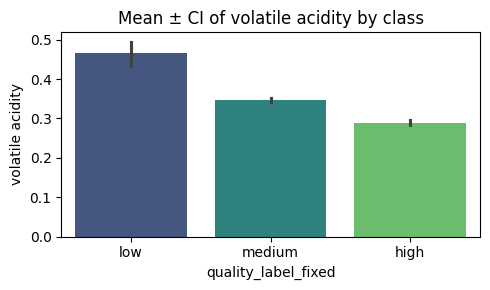

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hue_col, y=col, data=df, order=class_order, palette=palette, errorbar="ci")


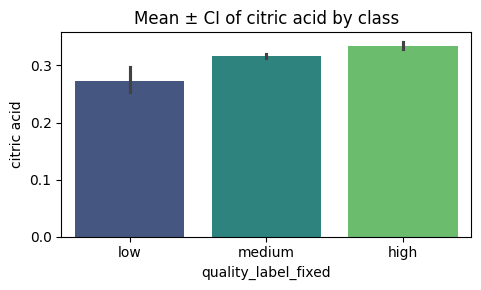

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hue_col, y=col, data=df, order=class_order, palette=palette, errorbar="ci")


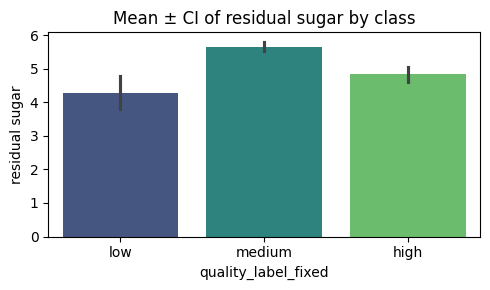

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hue_col, y=col, data=df, order=class_order, palette=palette, errorbar="ci")


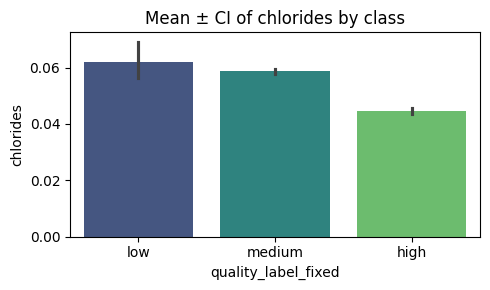

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hue_col, y=col, data=df, order=class_order, palette=palette, errorbar="ci")


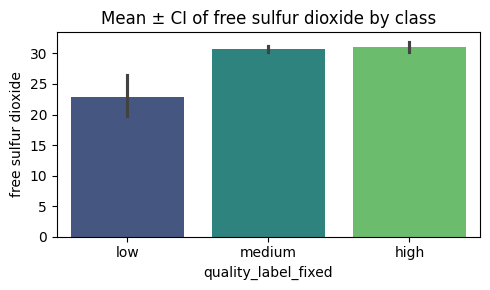

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hue_col, y=col, data=df, order=class_order, palette=palette, errorbar="ci")


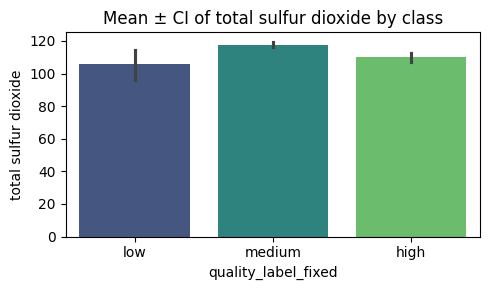

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hue_col, y=col, data=df, order=class_order, palette=palette, errorbar="ci")


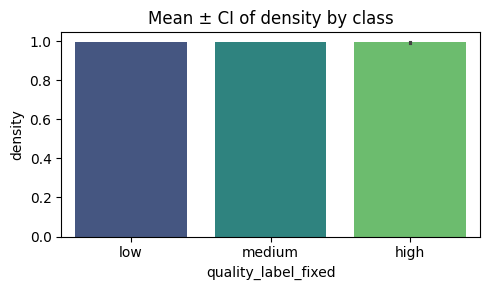

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


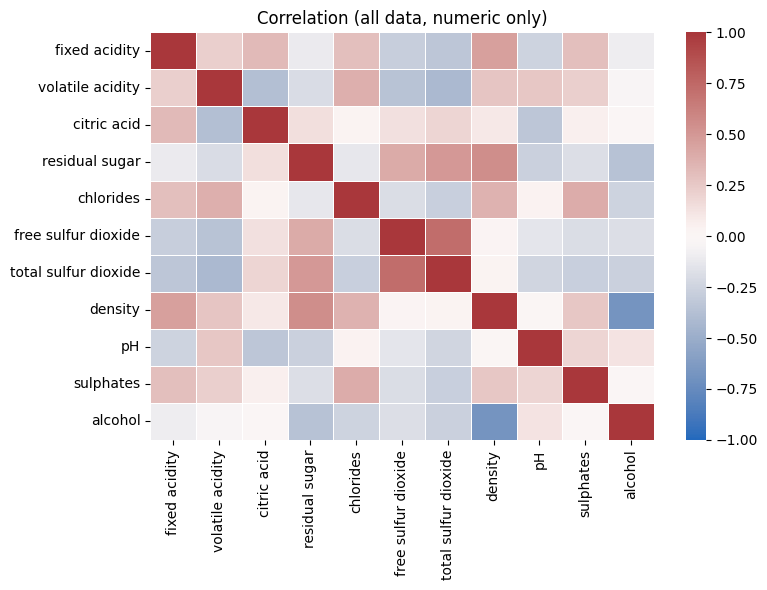


Correlation matrix for low (n=246):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.035099,0.416154,0.012814,0.151797,-0.071479,-0.095062,0.448273,-0.375714,0.153869,-0.147132
volatile acidity,0.035099,1.000000,-0.474229,-0.175385,0.288151,-0.207462,-0.401352,0.252719,0.396803,0.103904,0.060705
citric acid,0.416154,-0.474229,1.000000,0.245391,0.074957,0.137040,0.332596,0.120872,-0.498634,0.192844,-0.065793
residual sugar,0.012814,-0.175385,0.245391,1.000000,0.009770,0.220433,0.437348,0.504924,-0.249223,0.007744,-0.217438
chlorides,0.151797,0.288151,0.074957,0.009770,1.000000,-0.049213,-0.121570,0.375676,0.012079,0.600822,-0.230626
free sulfur dioxide,-0.071479,-0.207462,0.137040,0.220433,-0.049213,1.000000,0.683409,0.086391,-0.026065,0.072318,-0.185902
total sulfur dioxide,-0.095062,-0.401352,0.332596,0.437348,-0.121570,0.683409,1.000000,0.129638,-0.201784,0.040856,-0.296265
density,0.448273,0.252719,0.120872,0.504924,0.375676,0.086391,0.129638,1.000000,0.118558,0.361391,-0.576120
pH,-0.375714,0.396803,-0.498634,-0.249223,0.012079,-0.026065,-0.201784,0.118558,1.000000,0.071332,0.104353
sulphates,0.153869,0.103904,0.192844,0.007744,0.600822,0.072318,0.040856,0.361391,0.071332,1.000000,-0.067541


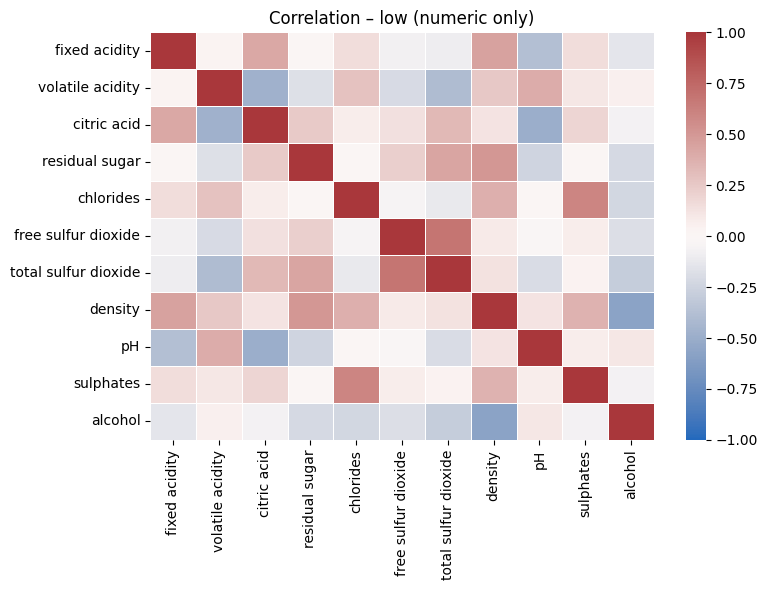


Correlation matrix for medium (n=4974):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.244539,0.290241,-0.146603,0.278011,-0.292190,-0.334754,0.425505,-0.228354,0.302747,-0.039903
volatile acidity,0.244539,1.000000,-0.382459,-0.218347,0.385092,-0.368129,-0.439506,0.292953,0.276031,0.267369,-0.047936
citric acid,0.290241,-0.382459,1.000000,0.159678,0.025892,0.154355,0.229499,0.087754,-0.340705,0.028237,-0.021038
residual sugar,-0.146603,-0.218347,0.159678,1.000000,-0.165747,0.453747,0.504597,0.559917,-0.249198,-0.185030,-0.356164
chlorides,0.278011,0.385092,0.025892,-0.165747,1.000000,-0.198491,-0.293746,0.308519,0.056741,0.405707,-0.211794
free sulfur dioxide,-0.292190,-0.368129,0.154355,0.453747,-0.198491,1.000000,0.733103,0.060922,-0.175901,-0.219947,-0.219735
total sulfur dioxide,-0.334754,-0.439506,0.229499,0.504597,-0.293746,0.733103,1.000000,0.026404,-0.260109,-0.268735,-0.267935
density,0.425505,0.292953,0.087754,0.559917,0.308519,0.060922,0.026404,1.000000,0.052608,0.273327,-0.641054
pH,-0.228354,0.276031,-0.340705,-0.249198,0.056741,-0.175901,-0.260109,0.052608,1.000000,0.189443,0.109650
sulphates,0.302747,0.267369,0.028237,-0.185030,0.405707,-0.219947,-0.268735,0.273327,0.189443,1.000000,-0.015374


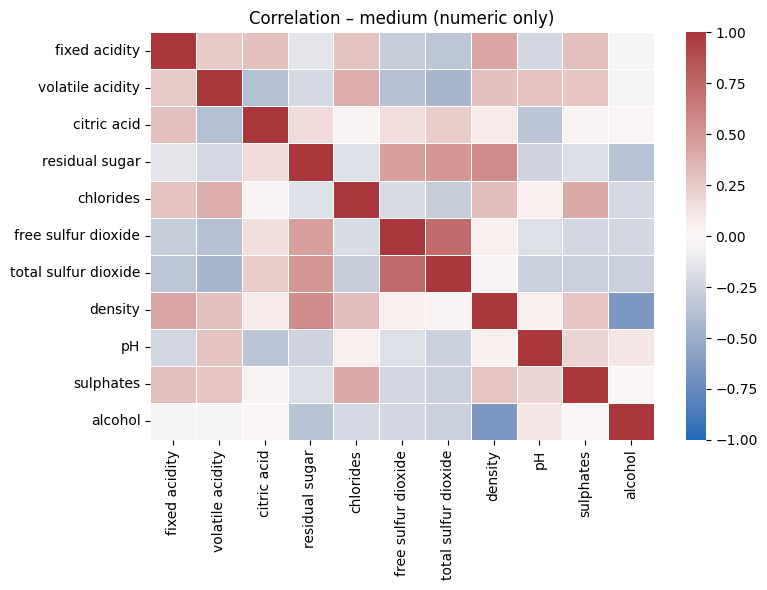


Correlation matrix for high (n=1277):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.146417,0.522330,0.001806,0.516273,-0.325046,-0.396981,0.604191,-0.313392,0.330467,-0.212393
volatile acidity,0.146417,1.000000,-0.220681,-0.130108,0.223067,-0.325085,-0.364205,0.023212,0.181999,0.191136,0.377226
citric acid,0.522330,-0.220681,1.000000,0.014269,0.252714,-0.031439,-0.079802,0.262613,-0.231196,0.130612,-0.098360
residual sugar,0.001806,-0.130108,0.014269,1.000000,-0.017836,0.213709,0.450354,0.570281,-0.353811,-0.235847,-0.441968
chlorides,0.516273,0.223067,0.252714,-0.017836,1.000000,-0.296830,-0.405187,0.563579,0.027991,0.418122,-0.265438
free sulfur dioxide,-0.325046,-0.325085,-0.031439,0.213709,-0.296830,1.000000,0.697696,-0.115404,-0.059777,-0.183860,-0.160121
total sulfur dioxide,-0.396981,-0.364205,-0.079802,0.450354,-0.405187,0.697696,1.000000,-0.042630,-0.140404,-0.408575,-0.277227
density,0.604191,0.023212,0.262613,0.570281,0.563579,-0.115404,-0.042630,1.000000,-0.117934,0.288835,-0.711471
pH,-0.313392,0.181999,-0.231196,-0.353811,0.027991,-0.059777,-0.140404,-0.117934,1.000000,0.230720,0.161044
sulphates,0.330467,0.191136,0.130612,-0.235847,0.418122,-0.183860,-0.408575,0.288835,0.230720,1.000000,-0.019007


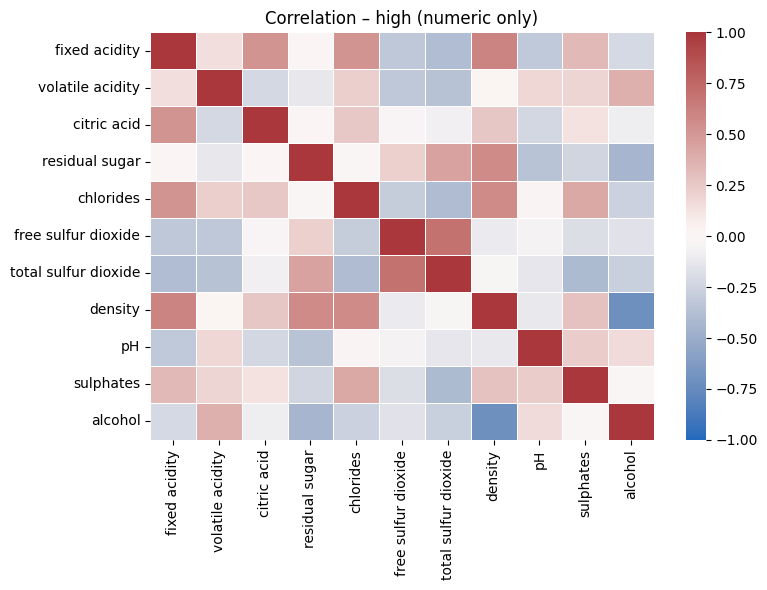

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/4139770643.py:121: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(hue_col)[num_cols_no_target]


fixed acidity                          volatile acidity  \
                             mean median    std  min   max             mean   
quality_label_fixed                                                           
low                         7.358    7.1  1.342  4.2  12.5            0.465   
medium                      7.242    7.0  1.280  3.8  15.9            0.346   
high                        7.086    6.9  1.343  3.9  15.6            0.289   

                                                ... sulphates                \
                    median    std   min    max  ...      mean median    std   
quality_label_fixed                             ...                           
low                   0.38  0.246  0.11  1.580  ...     0.506   0.49  0.160   
medium                0.30  0.166  0.08  1.330  ...     0.530   0.51  0.145   
high                  0.27  0.117  0.08  0.915  ...     0.541   0.51  0.162   

                                alcohol                           
                      min   max    mean median    std  min   max  
quality_label_fixed                                               
low                  0.25  2.00  10.184  10.05  0.999  8.0  13.5  
medium               0.23  1.98  10.265  10.00  1.071  8.0  14.9  
high                 0.22  1.36  11.433  11.50  1.216  8.5  14.2  

[3 rows x 55 columns]

In [13]:
# ============================================
# EDA – three classes (low / medium / high)


# 0) Create class labels
def label_quality_fixed(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

if "quality_label_fixed" not in df.columns:
    df["quality_label_fixed"] = df["quality"].apply(label_quality_fixed)

# Create order for classes
class_order = ["low", "medium", "high"]
df["quality_label_fixed"] = pd.Categorical(df["quality_label_fixed"], categories=class_order, ordered=True)

# helper variables
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols_no_target = [c for c in num_cols if c not in ["quality"]]  
hue_col = "quality_label_fixed"
palette = "viridis"

# 1) Class distribution (barplot)
display(
    df[hue_col].value_counts().rename("count").to_frame()
    .assign(proportion=lambda s: s["count"] / s["count"].sum())
)
plt.figure(figsize=(5,3))
sns.countplot(x=hue_col, data=df, order=class_order, palette=palette)
plt.title("Class distribution (low / medium / high)")
plt.xlabel("Quality class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2) Univariate distributions for a few features
features_for_univariate = num_cols_no_target[:min(8, len(num_cols_no_target))]

for col in features_for_univariate:
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    # Histogram (discrete bins)
    sns.histplot(data=df, x=col, hue=hue_col, hue_order=class_order, kde=False, element="step", stat="density", common_norm=False, ax=ax[0], palette=palette)
    ax[0].set_title(f"Histogram: {col}")
    # KDE
    sns.kdeplot(data=df, x=col, hue=hue_col, hue_order=class_order, ax=ax[1], common_norm=False, fill=False, palette=palette)
    ax[1].set_title(f"KDE: {col}")
    for a in ax: 
        a.set_xlabel(col)
        a.set_ylabel("Density")
    plt.tight_layout()
    plt.show()

# 3) Box/violin plots
features_for_box = num_cols_no_target[:min(8, len(num_cols_no_target))]
for col in features_for_box:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=hue_col, y=col, data=df, order=class_order, palette=palette)
    plt.title(f"{col} by class (boxplot)")
    plt.tight_layout()
    plt.show()

#Violin plots
"""
    plt.figure(figsize=(6,3))
    sns.violinplot(x=hue_col, y=col, data=df, order=class_order, inner="quartile", palette=palette, cut=0)
    plt.title(f"{col} by class (violin)")
    plt.tight_layout()
    plt.show()
"""
# 4) Bivariate plots
features_for_scatter = num_cols_no_target[:min(4, len(num_cols_no_target))]
if len(features_for_scatter) >= 2:
    # Pairplot - subsample if n large
    plot_df = df[[*features_for_scatter, hue_col]].dropna().copy()
    if len(plot_df) > 2000:
        plot_df = plot_df.sample(2000, random_state=0)
    g = sns.pairplot(plot_df, hue=hue_col, hue_order=class_order, diag_kind="hist", corner=True, palette=palette)
    g.fig.suptitle("Pairplot (numeric features) by class", y=1.02)
    plt.show()

# 5) Mean/CI by class (barplot) 
features_for_bars = num_cols_no_target[:min(8, len(num_cols_no_target))]
for col in features_for_bars:
    plt.figure(figsize=(5,3))
    sns.barplot(x=hue_col, y=col, data=df, order=class_order, palette=palette, errorbar="ci")
    plt.title(f"Mean ± CI of {col} by class")
    plt.tight_layout()
    plt.show()

# 6) Correlationer – total and per class
def plot_corr_heatmap(corr, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap="vlag", linewidths=.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Total
if len(num_cols_no_target) >= 2:
    corr_all = df[num_cols_no_target].corr()
    display(corr_all)
    plot_corr_heatmap(corr_all, "Correlation (all data, numeric only)")

# Per class
for label in class_order:
    subset = df[df[hue_col] == label]
    if subset.shape[0] >= 3 and len(num_cols_no_target) >= 2:
        corr = subset[num_cols_no_target].corr()
        print(f"\nCorrelation matrix for {label} (n={len(subset)}):")
        display(corr)
        plot_corr_heatmap(corr, f"Correlation – {label} (numeric only)")
    else:
        print(f"\nCorrelation – {label}: för få observationer eller features för korrelationsmatris.")

# 7) Quick summary table per class (mean/std/median for numeric features)
summary = (
    df.groupby(hue_col)[num_cols_no_target]
      .agg(['mean','median','std','min','max'])
      .round(3)
)
display(summary)



## Plot three pictures in one

/var/folders/j9/pl1n_9697qnb_360bstl9v3h0000gn/T/ipykernel_22723/3949851460.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=type_col, ax=ax, palette=palette)


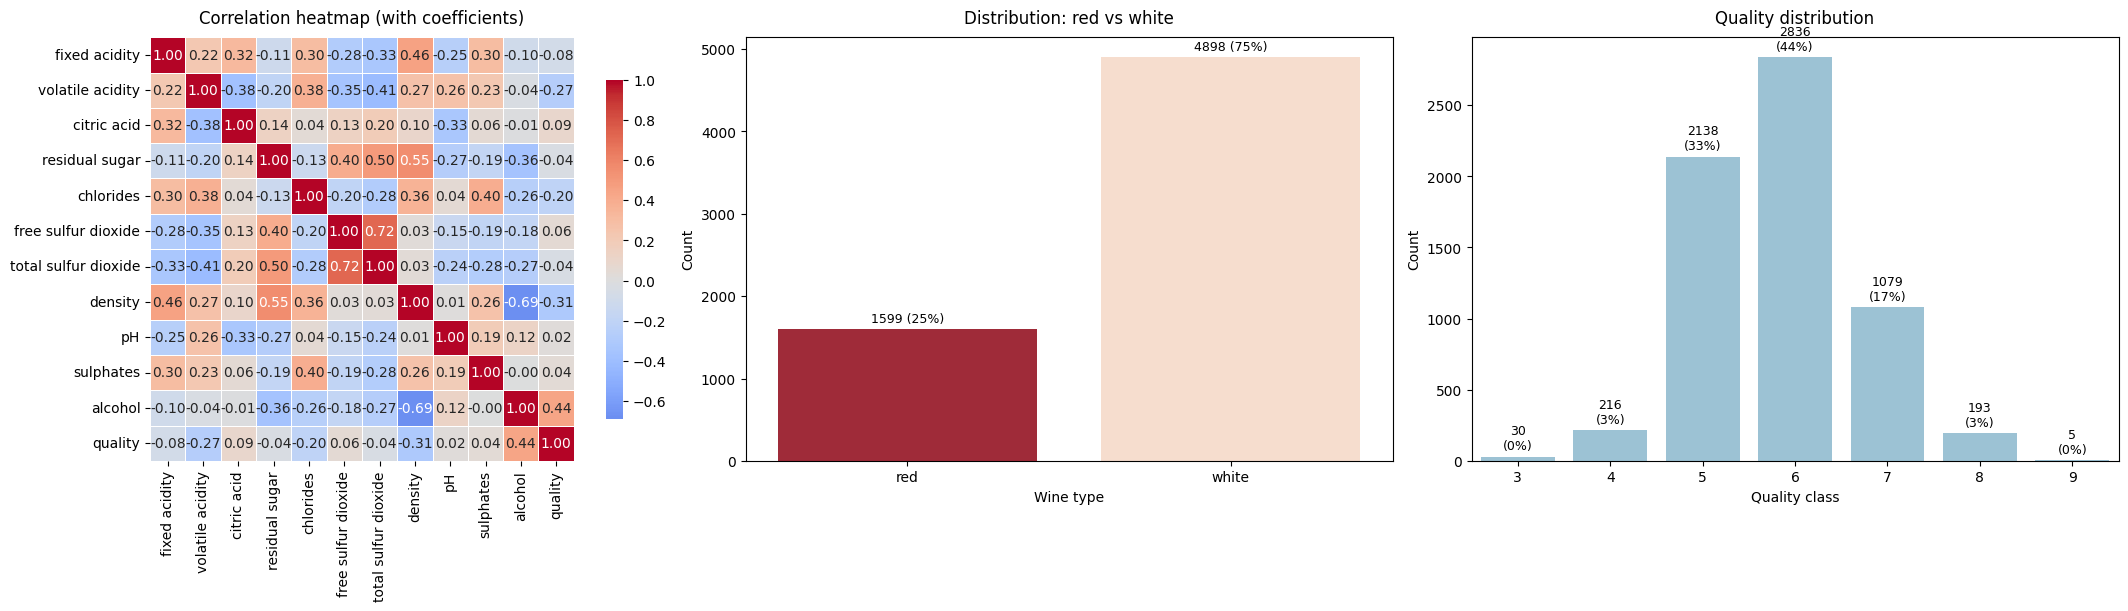

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TYPE_COL = "type"                # e.g. "type" or "wine_type"
QUALITY_COL = "quality"          # e.g. "quality" or "quality_label_fixed"

# 1) Heatmap
def draw_corr_heatmap(ax, df):
    num = df.select_dtypes(include=[np.number])
    corr = num.corr()
    sns.heatmap(
        corr, ax=ax, cmap="coolwarm", center=0,
        annot=True, fmt=".2f", linewidths=0.5, square=True,
        cbar_kws={"shrink": 0.8}
    )
    ax.set_title("Correlation heatmap (with coefficients)", pad=10)

# 2) Distribution red/white with colors
def draw_type_distribution(ax, df, type_col):
    palette = {"red": "#b2182b", "white": "#fddbc7"}
    sns.countplot(data=df, x=type_col, ax=ax, palette=palette)
    ax.set_xlabel("Wine type")
    ax.set_ylabel("Count")
    ax.set_title("Distribution: red vs white", pad=10)
    total = len(df)
    for p in ax.patches:
        n = int(p.get_height())
        ax.annotate(f"{n} ({n/total:.0%})",
                    (p.get_x()+p.get_width()/2, n),
                    ha="center", va="bottom", fontsize=9,
                    xytext=(0,3), textcoords="offset points")

# 3) Quality distribution without type
def draw_quality_distribution(ax, df, quality_col):
    sns.countplot(data=df, x=quality_col, ax=ax, color="#92c5de")
    ax.set_xlabel("Quality class")
    ax.set_ylabel("Count")
    ax.set_title("Quality distribution", pad=10)

    total = len(df)
    for p in ax.patches:
        n = int(p.get_height())
        ax.annotate(f"{n}\n({n/total:.0%})",
                    (p.get_x()+p.get_width()/2, n),
                    ha="center", va="bottom", fontsize=9,
                    xytext=(0,3), textcoords="offset points")

# Draw everything in one figure
fig, axes = plt.subplots(1, 3, figsize=(22, 6), constrained_layout=True)

draw_corr_heatmap(axes[0], df)
draw_type_distribution(axes[1], df, TYPE_COL)
draw_quality_distribution(axes[2], df, QUALITY_COL)

plt.show()

